In [1]:
## Standard Stuff
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import dask.array as da
import numcodecs

## HEALPix Specific
import healpix as hp
import easygems.healpix as egh
import easygems.remap as egr

import intake     # For catalogs
import zarr       # Data Formatting


In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
opth='/global/cfs/cdirs/m4549/scream-cess-healpix/'
#opth='/pscratch/sd/a/agett/scream/cess-copy/'

### Catalog test

In [4]:
catfn='/global/u1/a/agett/python/hackathon/scream_catalog.yaml'
scream_cat = intake.open_catalog(catfn)

# List different 'types' of data
print (list (scream_cat)) 


['scream2D_hrly', 'scream2D_ne120', 'scream3D_ne120', 'scream_lnd']


In [16]:
z=8
ds_2D = scream_cat.scream2D_ne120(zoom=z).to_dask()
ds_2D = ds_2D.pipe(egh.attach_coords)
ds_2D

/global/homes/a/agett/.conda/envs/hk25env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 299GB
Dimensions:          (time: 3168, cell: 786432)
Coordinates:
  * time             (time) object 25kB 2019-08-01 03:00:00 ... 2020-09-01 00...
    crs              int64 8B 0
  * cell             (cell) int64 6MB 0 1 2 3 4 ... 786428 786429 786430 786431
    lat              (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.1492
    lon              (cell) float64 6MB 45.0 45.18 44.82 ... 315.2 314.8 315.0
Data variables: (12/30)
    clt              (time, cell) float32 10GB ...
    hflsd            (time, cell) float32 10GB ...
    hfssd            (time, cell) float32 10GB ...
    huss             (time, cell) float32 10GB ...
    lwcre            (time, cell) float32 10GB ...
    pr               (time, cell) float32 10GB ...
    ...               ...
    tas              (time, cell) float32 10GB ...
    tauu             (time, cell) float32 10GB ...
    tauv             (time, cell) float32 10GB ...
    ts               (time, cell) float32 10GB ...
    uas              (time, cell) float32 10GB ...
    vas              (time, cell) float32 10GB ...
Attributes: (12/22)
    Conventions:                  CF-1.8
    atm_initial_conditions_file:  /lustre/orion/cli115/world-shared/e3sm/inpu...
    averaging_frequency:          3
    averaging_frequency_units:    nhours
    averaging_type:               AVERAGE
    case:                         cess-control.ne1024pg2_ne1024pg2.F2010-SCRE...
    ...                           ...
    product:                      model-output
    realm:                        atmos
    run_t0:                       2019-08-01-00000
    source:                       E3SM Atmosphere Model (EAMxx)
    topography_file:              /lustre/orion/cli115/world-shared/e3sm/inpu...
    username:                     noel

Text(0.5, 1.0, 'SCREAM tas 2020-01-05 HEALPix Level 8')

<Figure size 1200x800 with 0 Axes>

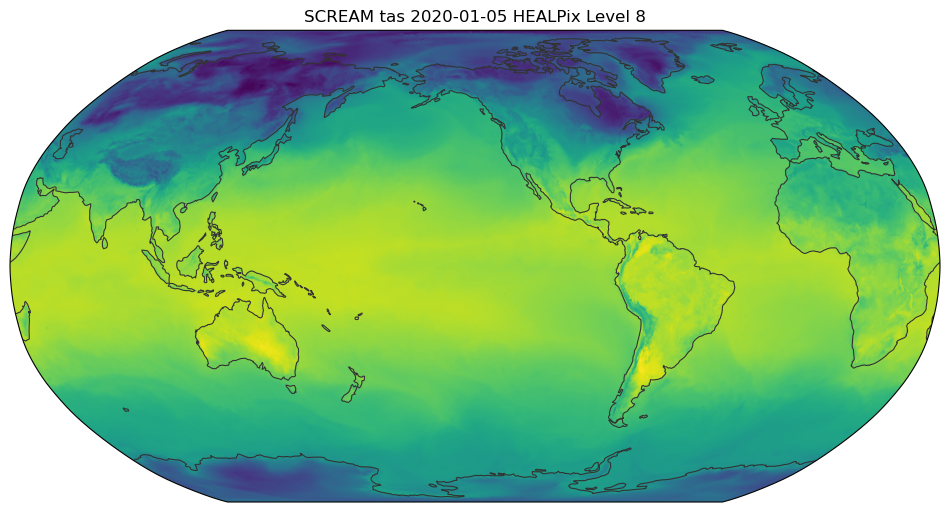

In [17]:
vart='tas'
tm='2020-01-05'
tmp=ds_2D[vart].sel(time=tm)[0]

egh.healpix_show(tmp)
plt.title('SCREAM '+vart+' '+tm+' HEALPix Level '+str(z))

### 2D hourly
Catalog entry with Multiple zarr files for variables merged

In [15]:
z=8
ds_hr = scream_cat.scream2D_hrly(zoom=z).to_dask()
ds_hr = ds_hr.pipe(egh.attach_coords)
ds_hr

/global/homes/a/agett/.conda/envs/hk25env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 60GB
Dimensions:  (time: 9457, cell: 786432)
Coordinates:
  * time     (time) object 76kB 2019-08-01 00:00:00 ... 2020-09-01 00:00:00
    crs      int64 8B 0
  * cell     (cell) int64 6MB 0 1 2 3 4 5 ... 786427 786428 786429 786430 786431
    lat      (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.2984 -0.1492
    lon      (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
Data variables:
    pr       (time, cell) float32 30GB dask.array<chunksize=(48, 4096), meta=np.ndarray>
    rlut     (time, cell) float32 30GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
Attributes: (12/22)
    Conventions:                  CF-1.8
    atm_initial_conditions_file:  /lustre/orion/cli115/world-shared/e3sm/inpu...
    averaging_frequency:          1
    averaging_frequency_units:    nhours
    averaging_type:               INSTANT
    case:                         cess-control.ne1024pg2_ne1024pg2.F2010-SCRE...
    ...                           ...
    product:                      model-output
    realm:                        atmos
    run_t0:                       2019-08-01-00000
    source:                       E3SM Atmosphere Model (EAMxx)
    topography_file:              /lustre/orion/cli115/world-shared/e3sm/inpu...
    username:                     noel

In [12]:
vt='rlut'

Text(0.5, 1.0, 'SCREAM rlut 2020-01-05 HEALPix Level 8')

<Figure size 1200x800 with 0 Axes>

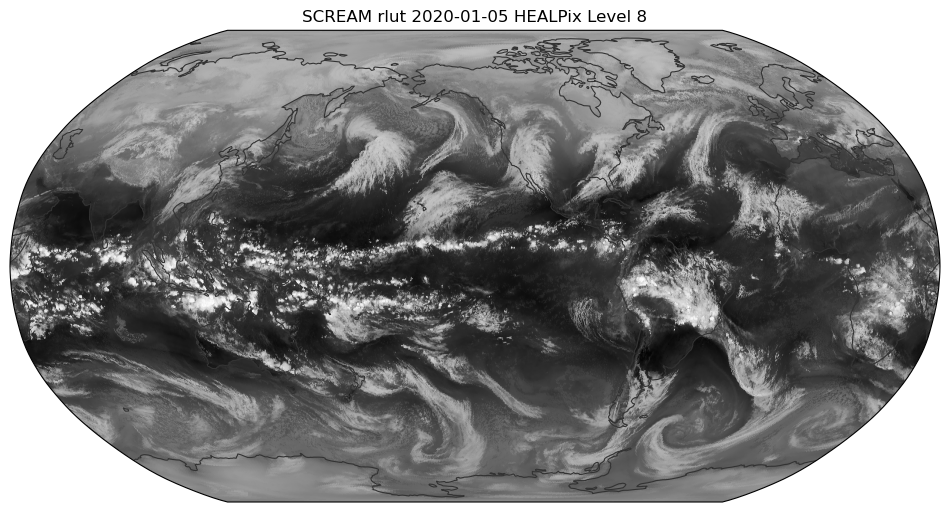

In [13]:
tm='2020-01-05'
tmp=ds_hr[vt].sel(time=tm)[0]

egh.healpix_show(tmp,cmap='binary')
plt.title('SCREAM '+vt+' '+tm+' HEALPix Level '+str(z))

### Land Variables

In [14]:
z=8
ds_lnd = scream_cat.scream_lnd(zoom=z).to_dask()
ds_lnd= ds_lnd.pipe(egh.attach_coords)
ds_lnd

/global/homes/a/agett/.conda/envs/hk25env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 3GB
Dimensions:  (time: 397, cell: 786432)
Coordinates:
  * time     (time) object 3kB 2019-08-01 00:00:00 ... 2020-09-01 00:00:00
    crs      int64 8B 0
  * cell     (cell) int64 6MB 0 1 2 3 4 5 ... 786427 786428 786429 786430 786431
    lat      (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.2984 -0.1492
    lon      (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
Data variables:
    mrso     (time, cell) float32 1GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
    swe      (time, cell) float32 1GB dask.array<chunksize=(24, 4096), meta=np.ndarray>
Attributes: (12/27)
    Conventions:                               CF-1.7
    Initial_conditions_dataset:                20220928.I2010CRUELM.ne1024pg2...
    PFT_physiological_constants_dataset:       clm_params_c180301.nc
    Surface_dataset:                           surfdata_ne1024pg2_simyr2010_c...
    case:                                      cess-control.ne1024pg2_ne1024p...
    comment:                                   NOTE: None of the variables ar...
    ...                                        ...
    product:                                   model-output
    realm:                                     land
    source:                                    E3SM Land Model
    source_id:                                 f4f0672bb4
    title:                                     ELM History file information
    username:                                  noel

Text(0.5, 1.0, 'SCREAM mrso 2020-01-05 HEALPix Level 8')

<Figure size 1200x800 with 0 Axes>

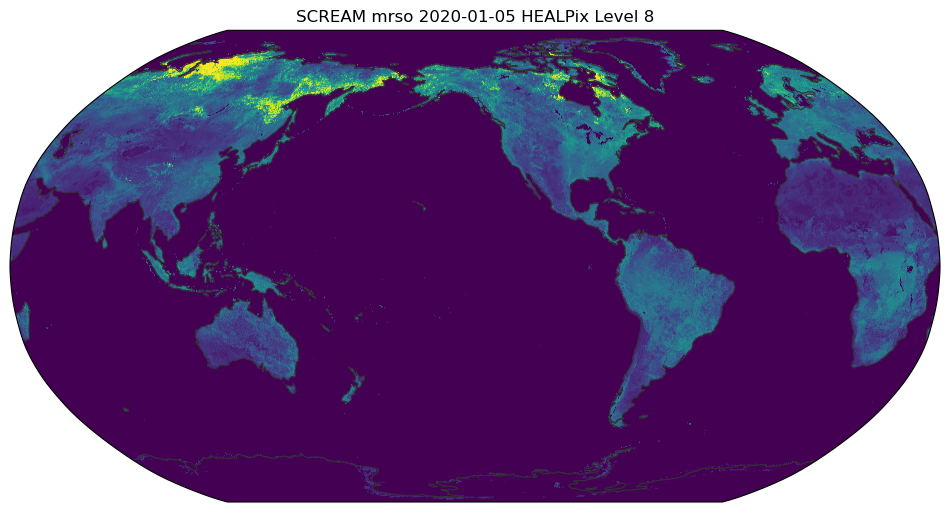

In [18]:
vt='mrso'
tm='2020-01-05'
tmp=ds_lnd[vt].sel(time=tm)[0]

egh.healpix_show(tmp)
plt.title('SCREAM '+vt+' '+tm+' HEALPix Level '+str(z))

### 3D variables